In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_html("https://fbref.com/pt/comps/24/2023/cronograma/2023-Serie-A-Resultados-e-Calendarios")[0]
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', 10)
print(df)

      Sem  Dia        Data Horário              Em casa   xG Resultado  xG.1  \
0     1.0  sáb  2023-04-15   16:00         América (MG)  1.1       0–3   3.1   
1     1.0  sáb  2023-04-15   16:00            Palmeiras  3.0       2–1   1.0   
2     1.0  sáb  2023-04-15   18:30  Red Bull Bragantino  2.0       2–1   0.7   
3     1.0  sáb  2023-04-15   18:30        Botafogo (RJ)  0.9       2–1   2.0   
4     1.0  sáb  2023-04-15   18:30       Ath Paranaense  0.8       2–0   1.0   
..    ...  ...         ...     ...                  ...  ...       ...   ...   
421  38.0  qua  2023-12-06   21:30           Fluminense  2.4       2–3   2.4   
422  38.0  qua  2023-12-06   21:30            São Paulo  0.5       1–0   0.5   
423  38.0  qua  2023-12-06   21:30             Cruzeiro  1.6       1–1   1.4   
424  38.0  qua  2023-12-06   21:30        Internacional  1.2       3–1   0.4   
425  38.0  qua  2023-12-06   21:30        Vasco da Gama  1.6       2–1   0.8   

               Visitante  Público      

In [3]:
resultados = df[['Sem', 'Data', 'Em casa', 'Resultado', 'Visitante']]
resultados = resultados.dropna(how='all')
resultados

,Sem,Data,Em casa,Resultado,Visitante
0,1.0,2023-04-15,América (MG),0–3,Fluminense
1,1.0,2023-04-15,Palmeiras,2–1,Cuiabá
2,1.0,2023-04-15,Red Bull Bragantino,2–1,Bahia
3,1.0,2023-04-15,Botafogo (RJ),2–1,São Paulo
4,1.0,2023-04-15,Ath Paranaense,2–0,Goiás
...,...,...,...,...,...
421,38.0,2023-12-06,Fluminense,2–3,Grêmio
422,38.0,2023-12-06,São Paulo,1–0,Flamengo
423,38.0,2023-12-06,Cruzeiro,1–1,Palmeiras
424,38.0,2023-12-06,Internacional,3–1,Botafogo (RJ)


In [4]:
placar = resultados.loc[:,"Resultado"].str.split("–", n = 1, expand = True)
print(placar)
resultados.loc[:,"CasaResul"] = placar.loc[:,0]
resultados.loc[:,"VisiResul"] = placar.loc[:,1]
resultados = resultados.drop(columns=["Resultado"])
resultados

     0  1
0    0  3
1    2  1
2    2  1
3    2  1
4    2  0
..  .. ..
421  2  3
422  1  0
423  1  1
424  3  1
425  2  1

[380 rows x 2 columns]


,Sem,Data,Em casa,Visitante,CasaResul,VisiResul
0,1.0,2023-04-15,América (MG),Fluminense,0,3
1,1.0,2023-04-15,Palmeiras,Cuiabá,2,1
2,1.0,2023-04-15,Red Bull Bragantino,Bahia,2,1
3,1.0,2023-04-15,Botafogo (RJ),São Paulo,2,1
4,1.0,2023-04-15,Ath Paranaense,Goiás,2,0
...,...,...,...,...,...,...
421,38.0,2023-12-06,Fluminense,Grêmio,2,3
422,38.0,2023-12-06,São Paulo,Flamengo,1,0
423,38.0,2023-12-06,Cruzeiro,Palmeiras,1,1
424,38.0,2023-12-06,Internacional,Botafogo (RJ),3,1


In [5]:

resultados["Vencedor"] = np.where(resultados["CasaResul"] > resultados["VisiResul"], "C", 
                                  np.where(resultados["CasaResul"] < resultados["VisiResul"], "V", "E"))
resultados

,Sem,Data,Em casa,Visitante,CasaResul,VisiResul,Vencedor
0,1.0,2023-04-15,América (MG),Fluminense,0,3,V
1,1.0,2023-04-15,Palmeiras,Cuiabá,2,1,C
2,1.0,2023-04-15,Red Bull Bragantino,Bahia,2,1,C
3,1.0,2023-04-15,Botafogo (RJ),São Paulo,2,1,C
4,1.0,2023-04-15,Ath Paranaense,Goiás,2,0,C
...,...,...,...,...,...,...,...
421,38.0,2023-12-06,Fluminense,Grêmio,2,3,V
422,38.0,2023-12-06,São Paulo,Flamengo,1,0,C
423,38.0,2023-12-06,Cruzeiro,Palmeiras,1,1,E
424,38.0,2023-12-06,Internacional,Botafogo (RJ),3,1,C


In [6]:
#verificando rodada atrasada
resultados[resultados.loc[:,"Sem"] == 15]
resultados.dtypes
print(resultados['CasaResul'].value_counts())
#transformar casa resul e visi resul em numeros
resultados['CasaResul'] = resultados['CasaResul'].astype(int)
resultados['VisiResul'] = resultados['VisiResul'].astype(int)

CasaResul
1    130
0     92
2     92
3     46
4     15
5      4
7      1
Name: count, dtype: int64


In [7]:
resultados['VCasaValor'] = np.where(resultados['Vencedor']=='C',1,np.where(resultados['Vencedor']=='E',0.5,0))
resultados['VVisValor'] = np.where(resultados['Vencedor']=='V',1,np.where(resultados['Vencedor']=='E',0.5,0))
resultados['count'] = 1


In [8]:
primeiro = resultados[resultados.loc[:, "Sem"] < 20]
segundo = resultados[resultados.loc[:, "Sem"] > 19]
print(primeiro.shape)
print(segundo.shape)

(190, 10)
(190, 10)


In [9]:
primeiro

,Sem,Data,Em casa,Visitante,CasaResul,VisiResul,Vencedor,VCasaValor,VVisValor,count
0,1.0,2023-04-15,América (MG),Fluminense,0,3,V,0.0,1.0,1
1,1.0,2023-04-15,Palmeiras,Cuiabá,2,1,C,1.0,0.0,1
2,1.0,2023-04-15,Red Bull Bragantino,Bahia,2,1,C,1.0,0.0,1
3,1.0,2023-04-15,Botafogo (RJ),São Paulo,2,1,C,1.0,0.0,1
4,1.0,2023-04-15,Ath Paranaense,Goiás,2,0,C,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
203,19.0,2023-08-14,Palmeiras,Cruzeiro,1,0,C,1.0,0.0,1
204,19.0,2023-08-15,Ath Paranaense,Cuiabá,2,0,C,1.0,0.0,1
205,19.0,2023-08-14,Red Bull Bragantino,Vasco da Gama,1,1,E,0.5,0.5,1
252,15.0,2023-09-18,Corinthians,Grêmio,4,4,E,0.5,0.5,1


In [10]:
PrimeiroTurnoC = primeiro.groupby(['Em casa'])[['count', 'VCasaValor','CasaResul','VisiResul']].sum().reset_index()
PrimeiroTurnoC = PrimeiroTurnoC.rename(columns={'Em casa':'time', 'CasaResul': 'GolsCasaC', 'VisiResul': 'GolsVisiC'})
PrimeiroTurnoV = primeiro.groupby(['Visitante'])[['count', 'VVisValor','CasaResul','VisiResul']].sum().reset_index()
PrimeiroTurnoV = PrimeiroTurnoV.rename(columns={'Visitante':'time', 'CasaResul': 'GolsCasaV', 'VisiResul': 'GolsVisiV'})

In [11]:
SegundoTurnoC = segundo.groupby(['Em casa'])[['count', 'VCasaValor','CasaResul','VisiResul']].sum().reset_index()
SegundoTurnoC = SegundoTurnoC.rename(columns={'Em casa':'time', 'CasaResul': 'GolsCasaC', 'VisiResul': 'GolsVisiC'})
SegundoTurnoV = segundo.groupby(['Visitante'])[['count', 'VVisValor','CasaResul','VisiResul']].sum().reset_index()
SegundoTurnoV = SegundoTurnoV.rename(columns={'Visitante':'time', 'CasaResul': 'GolsCasaV', 'VisiResul': 'GolsVisiV'})

In [12]:
PrimeiroTurno = pd.merge(PrimeiroTurnoC, PrimeiroTurnoV, on=['time'])
SegundoTurno = pd.merge(SegundoTurnoC, SegundoTurnoV, on=['time'])

In [13]:
PrimeiroTurno['W'] = PrimeiroTurno['VCasaValor']+PrimeiroTurno['VVisValor'] #win value
PrimeiroTurno['G'] = PrimeiroTurno['count_x'] + PrimeiroTurno['count_y']  #games
PrimeiroTurno['GF'] = PrimeiroTurno['GolsCasaC']+PrimeiroTurno['GolsVisiV'] #goals for
PrimeiroTurno['GA'] = PrimeiroTurno['GolsVisiC']+PrimeiroTurno['GolsCasaV'] #goals against

SegundoTurno['W'] = SegundoTurno['VCasaValor']+SegundoTurno['VVisValor'] #win value
SegundoTurno['G'] = SegundoTurno['count_x'] + SegundoTurno['count_y']  #games
SegundoTurno['GF'] = SegundoTurno['GolsCasaC']+SegundoTurno['GolsVisiV'] #goals for
SegundoTurno['GA'] = SegundoTurno['GolsVisiC']+SegundoTurno['GolsCasaV'] #goals against

In [14]:
PrimeiroTurno['wpc'] = PrimeiroTurno['W']/PrimeiroTurno['G'] #win percentage
PrimeiroTurno['pyth'] = PrimeiroTurno['GF']**2/(PrimeiroTurno['GF']**2 + PrimeiroTurno['GA']**2)

SegundoTurno['wpc'] = SegundoTurno['W']/SegundoTurno['G'] #win percentage
SegundoTurno['pyth'] = SegundoTurno['GF']**2/(SegundoTurno['GF']**2 + SegundoTurno['GA']**2)


<Axes: xlabel='pyth', ylabel='wpc'>

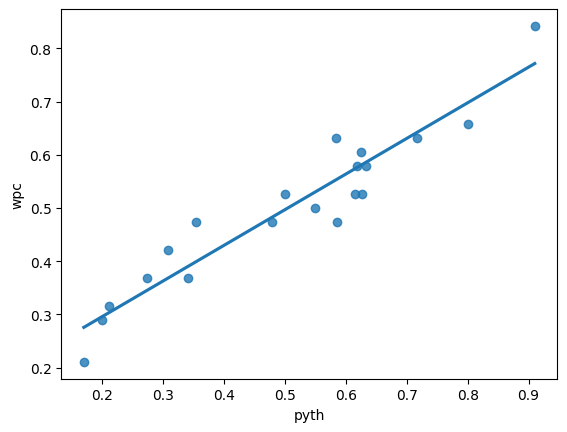

In [15]:
sns.regplot(x="pyth", y = "wpc", data = PrimeiroTurno,ci=None)

<Axes: xlabel='pyth', ylabel='wpc'>

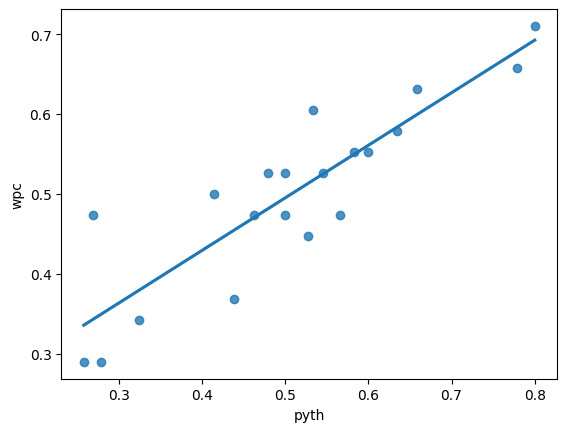

In [16]:
sns.regplot(x="pyth", y = "wpc", data = SegundoTurno,ci=None)

In [17]:
Bra = pd.merge(PrimeiroTurno, SegundoTurno, on=['time'])
Bra

,time,count_x_x,VCasaValor_x,GolsCasaC_x,GolsVisiC_x,count_y_x,VVisValor_x,GolsCasaV_x,GolsVisiV_x,W_x,G_x,GF_x,GA_x,wpc_x,pyth_x,count_x_y,VCasaValor_y,GolsCasaC_y,GolsVisiC_y,count_y_y,VVisValor_y,GolsCasaV_y,GolsVisiV_y,W_y,G_y,GF_y,GA_y,wpc_y,pyth_y
0,América (MG),10,2.5,9,20,9,1.5,22,10,4.0,19,19,42,0.210526,0.169882,9,3.5,12,18,10,2.0,21,11,5.5,19,23,39,0.289474,0.258049
1,Ath Paranaense,10,8.0,19,10,9,3.0,12,9,11.0,19,28,22,0.578947,0.618297,9,6.0,14,9,10,4.0,12,9,10.0,19,23,21,0.526316,0.545361
2,Atlético Mineiro,9,4.5,11,10,10,5.5,7,11,10.0,19,22,17,0.526316,0.626132,10,8.0,17,6,9,5.5,9,13,13.5,19,30,15,0.710526,0.800000
3,Bahia,9,4.5,14,12,10,2.5,13,4,7.0,19,18,25,0.368421,0.341412,10,6.0,15,9,9,3.0,19,17,9.0,19,32,28,0.473684,0.566372
4,Botafogo (RJ),10,10.0,23,3,9,6.0,8,12,16.0,19,35,11,0.842105,0.910104,9,3.0,13,14,10,4.0,12,10,7.0,19,23,26,0.368421,0.439004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,Palmeiras,9,7.0,17,8,10,5.5,9,17,12.5,19,34,17,0.657895,0.800000,10,8.0,18,4,9,4.5,12,12,12.5,19,30,16,0.657895,0.778547
16,Red Bull Bragantino,10,7.0,15,7,9,5.0,10,12,12.0,19,27,17,0.631579,0.716110,9,6.5,13,7,10,4.0,11,9,10.5,19,22,18,0.552632,0.599010
17,Santos,10,5.5,16,14,9,1.5,17,3,7.0,19,19,31,0.368421,0.273071,9,4.0,10,14,10,5.0,19,10,9.0,19,20,33,0.473684,0.268637
18,São Paulo,10,7.5,18,9,9,2.5,10,6,10.0,19,24,19,0.526316,0.614728,9,7.0,11,4,10,2.5,15,5,9.5,19,16,19,0.500000,0.414911


<Axes: xlabel='wpc_x', ylabel='wpc_y'>

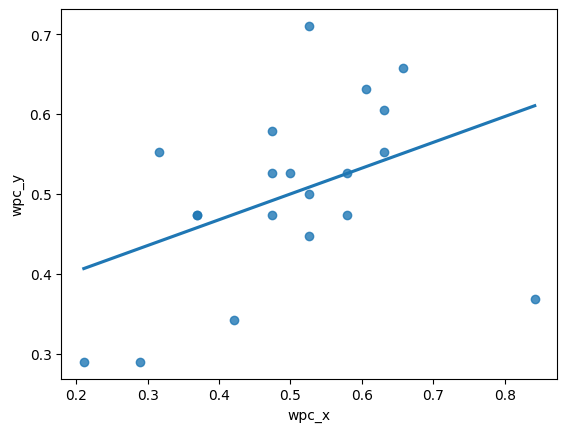

In [18]:
sns.regplot(x="wpc_x", y = "wpc_y", data = Bra,ci=None)

<Axes: xlabel='pyth_x', ylabel='wpc_y'>

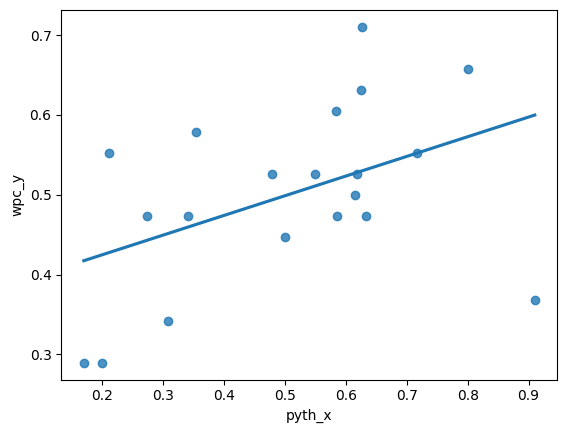

In [19]:
sns.regplot(x="pyth_x", y = "wpc_y", data = Bra, ci=None)

In [20]:
dd = Bra.loc[:,['pyth_x', 'wpc_x', 'pyth_y', 'wpc_y']]
dd

,pyth_x,wpc_x,pyth_y,wpc_y
0,0.169882,0.210526,0.258049,0.289474
1,0.618297,0.578947,0.545361,0.526316
2,0.626132,0.526316,0.800000,0.710526
3,0.341412,0.368421,0.566372,0.473684
4,0.910104,0.842105,0.439004,0.368421
...,...,...,...,...
15,0.800000,0.657895,0.778547,0.657895
16,0.716110,0.631579,0.599010,0.552632
17,0.273071,0.368421,0.268637,0.473684
18,0.614728,0.526316,0.414911,0.500000


In [21]:
cor_matrix = dd.corr()

# View the correlation matrix
cor_matrix

,pyth_x,wpc_x,pyth_y,wpc_y
pyth_x,1.000000,0.948324,0.513934,0.447302
wpc_x,0.948324,1.000000,0.467315,0.414117
pyth_y,0.513934,0.467315,1.000000,0.877385
wpc_y,0.447302,0.414117,0.877385,1.000000
